# For Collab and Drive

************************************************

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# os.chdir('/content/drive/MyDrive/AI_Project/binary classification')

In [ ]:
# !mkdir -p /content/augmented_resized_V2/

In [ ]:
# !unzip -q /content/drive/MyDrive/AI_Project/val.zip -d /content/augmented_resized_V2/

In [ ]:
# !unzip -q /content/drive/MyDrive/AI_Project/test.zip -d /content/augmented_resized_V2/

In [ ]:
# !unzip -q /content/drive/MyDrive/AI_Project/train.zip -d /content/augmented_resized_V2/


****************************************************************

### If run locallay unzip the traning/testing/validation data in augmented_resized_V2 folder and remove content from the paths in the code


### If run on Collab, place the zip files of traning/testing/validation data  in a folder called "AI_Project" in the drive(if you change the name make sure to update the paths above). And uplaod this whole folder as it is to "AI_Project"

[Data link](https://www.kaggle.com/datasets/ascanipek/eyepacs-aptos-messidor-diabetic-retinopathy/data)

In [7]:
import sys
from pathlib import Path
import json
import os

project_root = Path.cwd().parent

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from src.utils import *
from src.model import *
from src.Dataprocessing import *

In [9]:
os.chdir(project_root)
print(f"Current working directory: {os.getcwd()}")

Current working directory: /home/ali/Desktop/AIDE/MLOPS/project/Model


In [5]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms as T

device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_transform=T.Compose(
    [
        T.RandomResizedCrop(224),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
        T.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    ]
)

test_transform=T.Compose(
    [
        T.RandomResizedCrop(224),
        T.ToTensor(),
        T.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    ]
)


In [ ]:
def classRemap(idx):
    return idx if idx==0 else 1

binary_train_dataset=datasets.ImageFolder(root="data/train_binary",transform=train_transform,target_transform=classRemap)
binary_test_dataset=datasets.ImageFolder(root="data/test",transform=test_transform,target_transform=classRemap)

binary_train_dataloader=DataLoader(binary_train_dataset,batch_size=64,shuffle=True,num_workers=2)
binary_test_dataloader=DataLoader(binary_test_dataset,batch_size=64,shuffle=False,num_workers=2)


In [11]:
print(len(binary_train_dataloader))

1801


In [12]:
import os
if os.path.exists('models/binary_model/model_accuracy_dict.json'):
    with open('models/binary_model/model_accuracy_dict.json', 'r') as f:
        Model_accuracy_dict = json.load(f)
        best_accuracy=max(Model_accuracy_dict["Binary_cls"]['val_acc'])
else:
    Model_accuracy_dict={"Binary_cls":{"train_acc":[],"val_acc":[]}}
    best_accuracy=None

In [13]:
print(Model_accuracy_dict)

{'Binary_cls': {'train_acc': [0.6955944498919655, 0.750800496351125, 0.777665934866931, 0.7915759148219818, 0.8002273496411867, 0.817712446091235, 0.8214611119306496, 0.8258866202132922, 0.8374623614859295, 0.8409420258414974, 0.8441700436476601, 0.8444737550003905, 0.8463914752562022], 'val_acc': [0.7437504401098515, 0.7793817336807267, 0.7869868319132456, 0.807055841137948, 0.8024082811069643, 0.8264910921766073, 0.825646081261883, 0.8226181254841208, 0.8308569819026829, 0.8345186958664883, 0.8394479262023801, 0.8378987395253855, 0.8400112668121963]}}


In [15]:
save_path='models/binary_model/binary_model.pth'
best_path='models/binary_model/best_binary_model.pth'
model=resnet50(block=Bottleneck,layers=[3,4,6,3],num_classes=2)
if os.path.exists(save_path):
    model.load_state_dict(torch.load(save_path,map_location=device))
    print("model loaded")

model.to(device)

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.5e-5)


model loaded


[1,  100] loss: 0.351
[1,  200] loss: 0.348
[1,  300] loss: 0.357
[1,  400] loss: 0.351
[1,  500] loss: 0.348
[1,  600] loss: 0.354
[1,  700] loss: 0.336
[1,  800] loss: 0.354
[1,  900] loss: 0.363
[1, 1000] loss: 0.343
[1, 1100] loss: 0.340
[1, 1200] loss: 0.356
[1, 1300] loss: 0.348
[1, 1400] loss: 0.345
[1, 1500] loss: 0.355
[1, 1600] loss: 0.343
[1, 1700] loss: 0.331
[1, 1800] loss: 0.356
Train Accuracy: 0.844
Validation Accuracy: 0.838


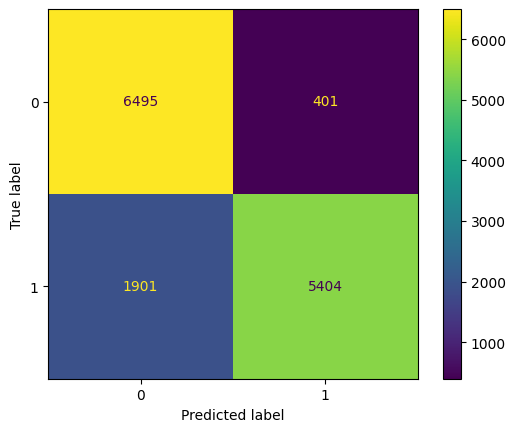

[2,  100] loss: 0.352
[2,  200] loss: 0.350
[2,  300] loss: 0.350
[2,  400] loss: 0.350
[2,  500] loss: 0.339
[2,  600] loss: 0.346
[2,  700] loss: 0.354
[2,  800] loss: 0.352
[2,  900] loss: 0.339
[2, 1000] loss: 0.347
[2, 1100] loss: 0.338
[2, 1200] loss: 0.342
[2, 1300] loss: 0.356
[2, 1400] loss: 0.348
[2, 1500] loss: 0.340
[2, 1600] loss: 0.336
[2, 1700] loss: 0.347
[2, 1800] loss: 0.347
Train Accuracy: 0.846
Validation Accuracy: 0.840
Model saved with accuracy: 0.840


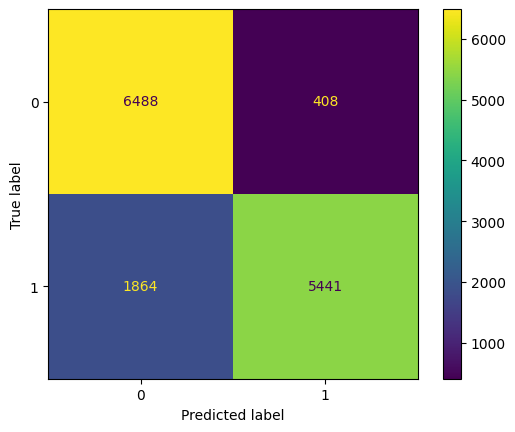

In [ ]:
# for g in optimizer.param_groups:
#     g['lr'] = 5e-5

train_acc,val_acc=model_inference(model,binary_train_dataloader,binary_test_dataloader,2,optimizer,criterion,best_path,save_path,device,best_accuracy)
Model_accuracy_dict["Binary_cls"]["train_acc"].extend(train_acc)
Model_accuracy_dict["Binary_cls"]["val_acc"].extend(val_acc)

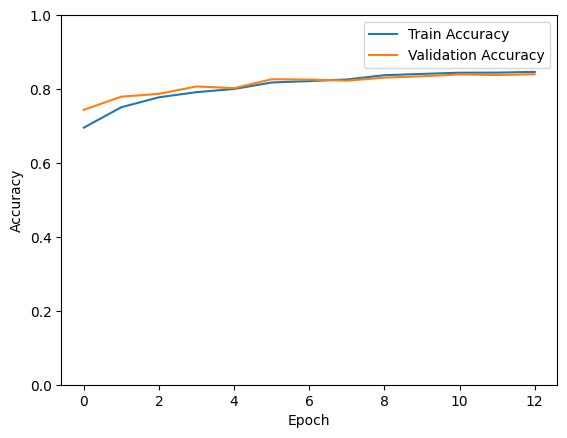

In [18]:
accuracy_plot({"train_acc":Model_accuracy_dict["Binary_cls lr=0.0001"]["train_acc"],"val_acc":Model_accuracy_dict["Binary_cls lr=0.0001"]["val_acc"]})

In [ ]:
with open('models/binary_model/model_accuracy_dict.json', 'w') as f:
    json.dump(Model_accuracy_dict, f)

In [ ]:
val_transform=T.Compose(
    [
        T.Resize(224),
        T.ToTensor(),
        T.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    ]
)

valdata=datasets.ImageFolder(root="data/val",transform=val_transform,target_transform=classRemap)
val_dataloader=DataLoader(valdata,batch_size=64,shuffle=False,num_workers=2)

accuracy_test(model,val_dataloader,2,device)

Accuracy of     0 : 97.69 %
Accuracy of     1 : 80.87 %
